In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [3]:
from helpers import load_data

# load dataset
x, y = load_data()

In [4]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

In [6]:
build_k_indices(np.arange(10), 4, 1)

array([[2, 9],
       [6, 4],
       [0, 3],
       [1, 7]])

In [12]:
def build_exclude_mask(N, exclude_indices):
    mask = np.isin(np.arange(N), exclude_indices)
    return np.invert(mask)

In [13]:
build_exclude_mask(10, [5, 2, 8])

array([ True,  True, False,  True,  True, False,  True,  True, False,
        True])

In [14]:
from costs import compute_mse
from ridge_regression import ridge_regression
from build_polynomial import build_poly

In [23]:
def cross_validation(y, x, k_fold, lambda_, degree, seed):
    """return the loss of ridge regression."""
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    N = len(y)
    
    train_losses, test_losses = [], []
    for test_indices in k_indices:
        train_indices = build_exclude_mask(N, test_indices)
        xtrain, ytrain = x[train_indices], y[train_indices]
        xtest, ytest = x[test_indices], y[test_indices]
        
        xtest = build_poly(xtest, degree)
        xtrain = build_poly(xtrain, degree)
        
        w = ridge_regression(ytrain, xtrain, lambda_)
        test_loss = compute_mse(ytest, xtest, w)
        train_loss = compute_mse(ytrain, xtrain, w)
        test_losses.append(test_loss)
        train_losses.append(train_loss)
    
    return np.mean(train_losses), np.mean(test_losses)

In [16]:
from math import sqrt

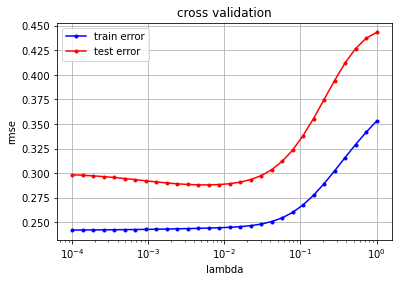

In [26]:
from plots import cross_validation_visualization

def cross_validation_demo():
    seed = 1
    degree = 7
    k_fold = 4
    lambdas = np.logspace(-4, 0, 30)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    # ***************************************************
    # INSERT YOUR CODE HERE
    # cross validation: TODO
    # *************************************************** 
    for lambda_ in lambdas:
        loss_tr, loss_te = cross_validation(y, x, k_fold, lambda_, degree, seed)
        rmse_tr.append(sqrt(2*loss_tr))
        rmse_te.append(sqrt(2*loss_te))
        
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)

cross_validation_demo()

## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

In [27]:
from least_squares import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization

In [ ]:
def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        # ***************************************************
        # INSERT YOUR CODE HERE
        # split data with a specific seed: TODO
        # ***************************************************
        xtrain, ytrain, xtest, ytest = split_data(x, y, ratio_train, seed)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # bias_variance_decomposition: TODO
        # ***************************************************
        w = least_squares(ytrain, xtrain)
        

    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)

bias_variance_demo()